In [ ]:
## Find how guest origin and type related with the length of the stay

====== ANALYSIS OF LENGTH OF STAY PATTERNS ======

Length of Stay - Summary Statistics:
count    118087.000000
mean          3.447831
std           2.522487
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          56.000000
Name: total_stay, dtype: float64


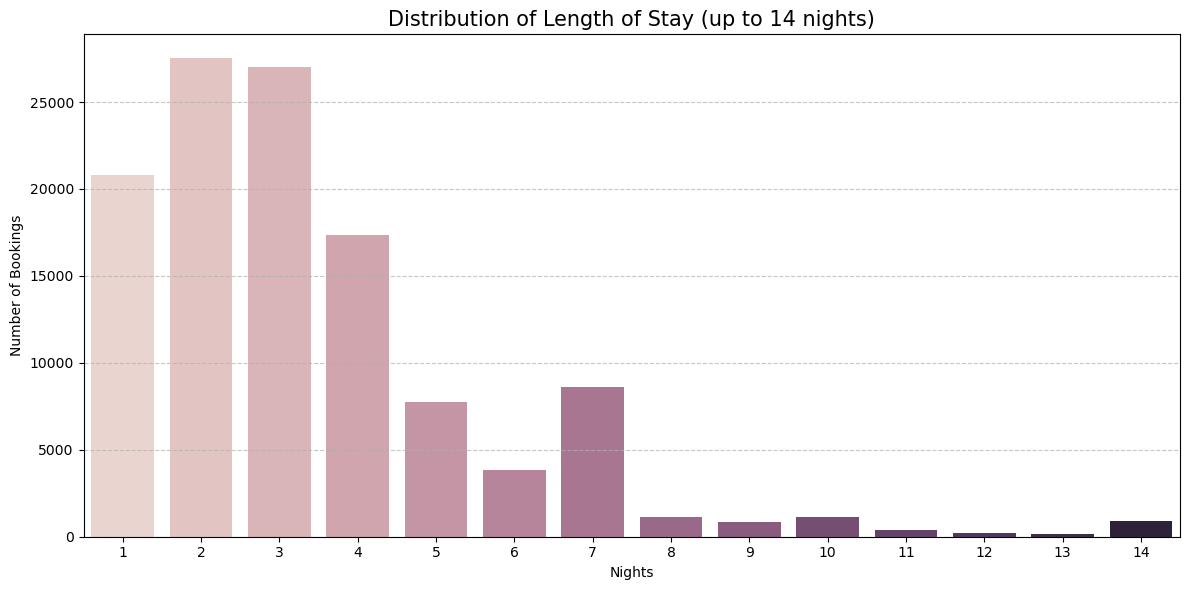


Average Length of Stay by Country (Top 10 countries by booking volume):
                    mean  median  count
country_name                           
Ireland         5.147940     5.0   3373
United Kingdom  4.794461     4.0  12095
Belgium         3.691617     3.0   2338
Germany         3.539602     3.0   7285
France          3.511984     3.0  10389
Brazil          3.497068     3.0   2217
China           3.395870     3.0   2276
Italy           3.268903     3.0   3756
Spain           3.080407     3.0   8544
Portugal        2.947349     2.0  47938


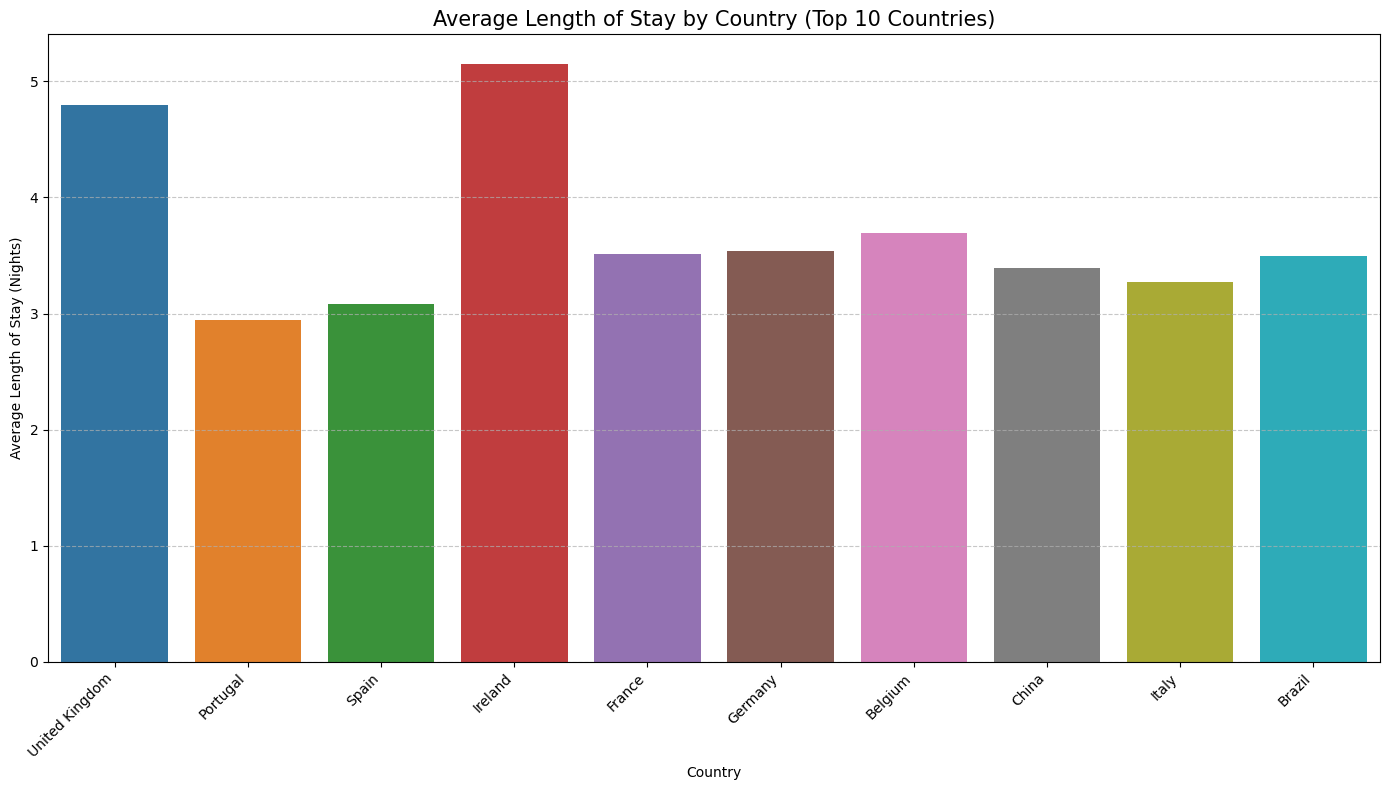

/tmp/ipykernel_13771/3345191718.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


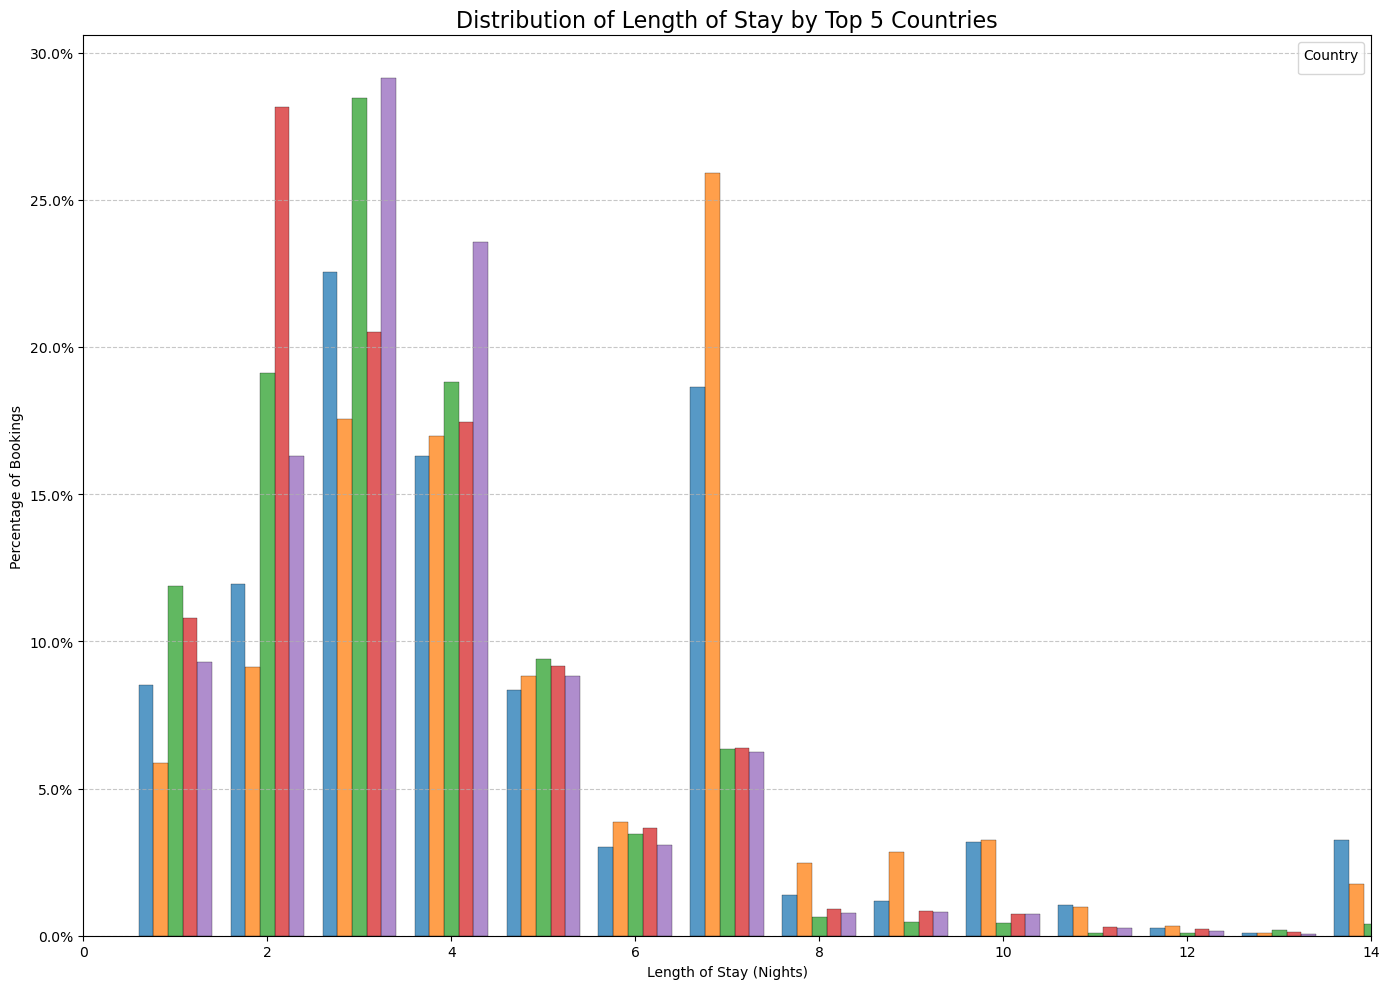


Average Length of Stay by Customer Type:
                     mean  median  count
customer_type                           
Contract         5.345907     4.0   4056
Transient        3.471455     3.0  88509
Transient-Party  3.068192     3.0  24959
Group            2.889876     2.0    563


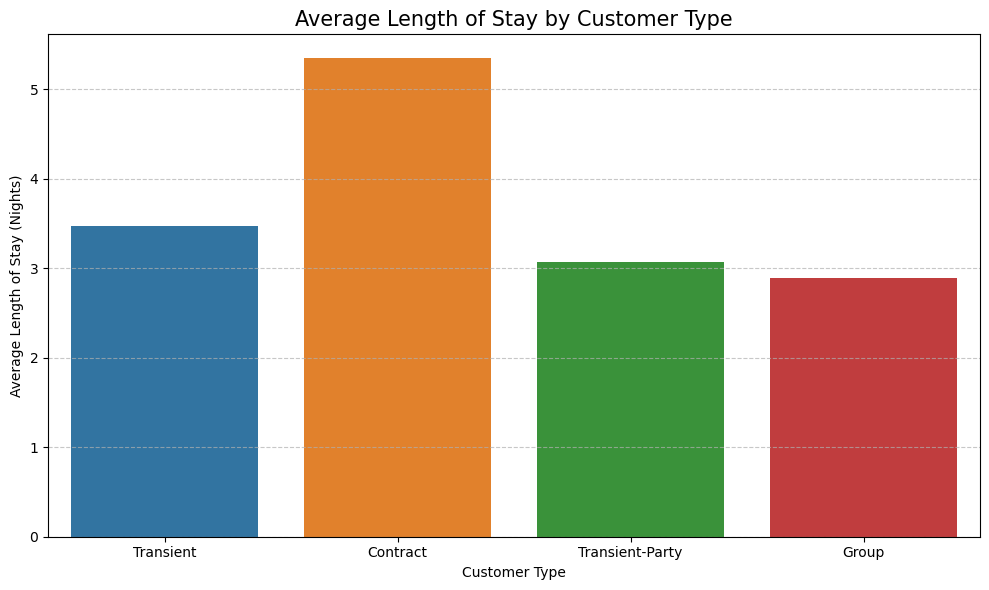

/tmp/ipykernel_13771/3345191718.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Customer Type')


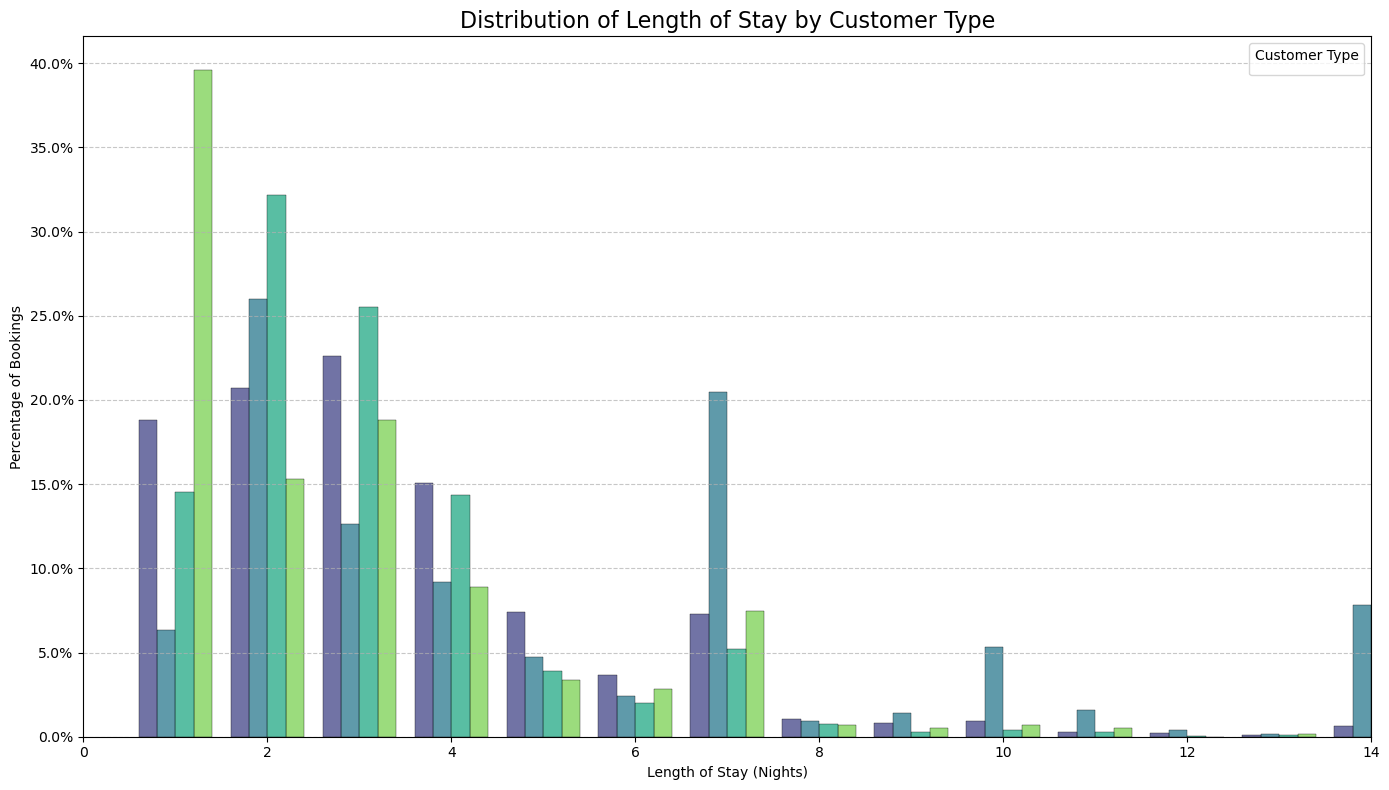


Average Length of Stay by Country and Customer Type:
customer_type   Contract     Group  Transient  Transient-Party
country_name                                                  
Belgium         3.288136  6.400000   3.695652         3.658754
Brazil          4.705882  2.466667   3.589220         2.835766
China           2.733333  3.300000   3.332969         3.696897
France          3.300546  3.476190   3.644638         2.951090
Germany         5.416667  2.807692   3.847485         2.768402
Ireland         7.435644  5.285714   5.001812         5.486166
Italy           3.528302  1.916667   3.397547         2.883569
Portugal        3.413709  2.318367   3.001128         2.732218
Spain           3.195266  1.800000   3.121958         2.908859
United Kingdom  8.522727  4.226190   4.328590         4.292444


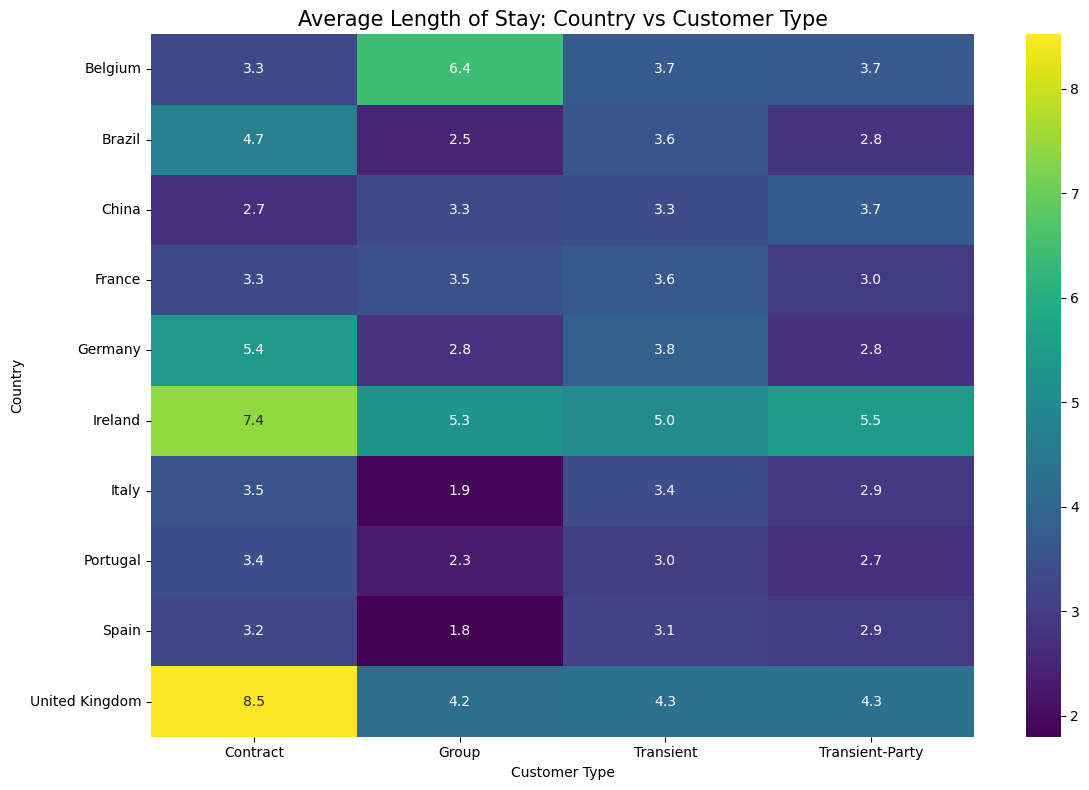

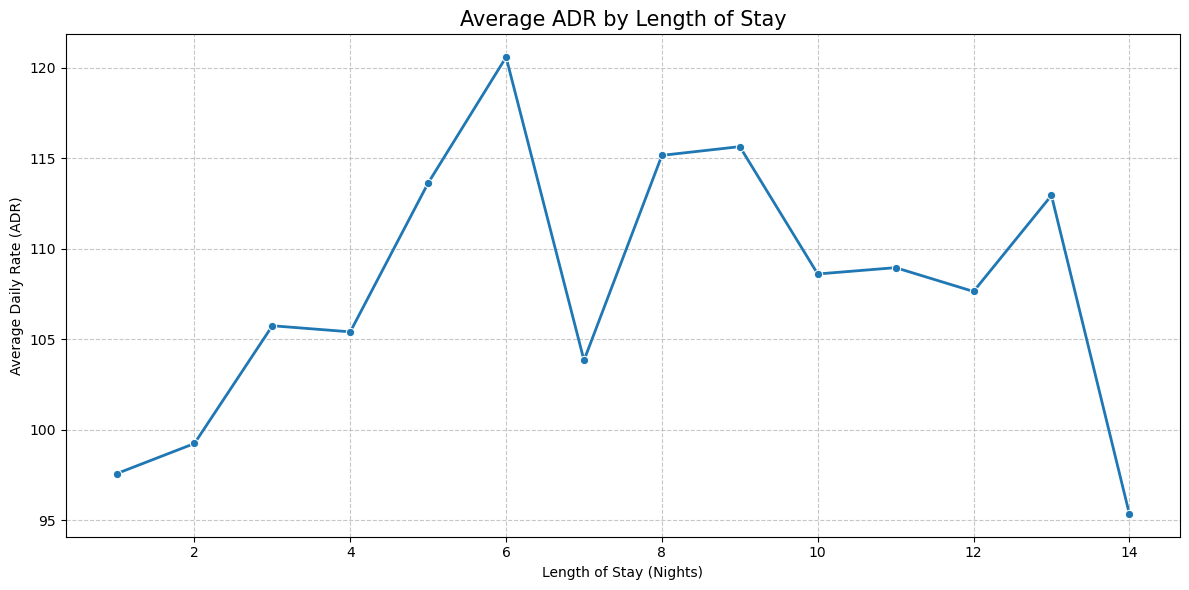


Revenue Analysis by Length of Stay Category:
              potential_revenue                             adr
                           mean          sum  count        mean
stay_category                                                  
1 night               97.579038   2027692.41  20780   97.579038
2-3 nights           257.321226  14031983.77  54531  102.467997
4-7 nights           552.808003  20768996.66  37570  108.298568
8-14 nights         1115.665182   5332879.57   4780  109.006195
15+ nights          1677.597488    714656.53    426   81.278333


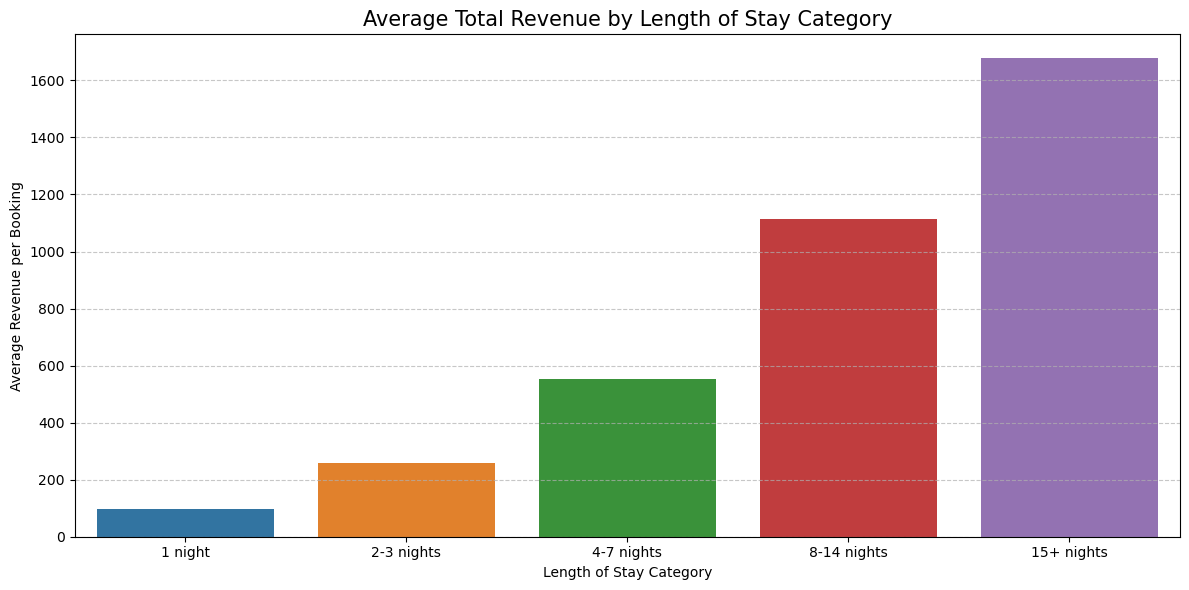


====== SUMMARY AND RECOMMENDATIONS ======

Key Insights:
1. Most common length of stay: 2 nights
2. Country with longest average stay: Ireland (5.15 nights)
3. Customer type with longest average stay: Contract (5.35 nights)
4. Length of stay with highest ADR: 6.0 nights ($120.58)
5. Most profitable stay category: 15+ nights ($1677.60 per booking)

Recommendations to Optimize Length of Stay:
1. Create targeted marketing campaigns for countries with shorter stays to extend their visits
2. Develop incentives for guests to book the optimal stay length (e.g., discounts for bookings of specific durations)
3. Design special packages for customer types with predictable stay patterns
4. Implement dynamic pricing based on length of stay to maximize revenue
5. Focus on converting shorter stays into 15+ nights category stays for maximum revenue
6. Develop loyalty programs rewarding extended stays for frequent travelers


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Load the data if not already loaded
df = pd.read_csv('hotel_bookings_clean.csv', parse_dates=['arrival_date'])

# Calculate total length of stay if not already calculated
if 'total_stay' not in df.columns:
    df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

print("====== ANALYSIS OF LENGTH OF STAY PATTERNS ======")

# Summary statistics of length of stay
print("\nLength of Stay - Summary Statistics:")
print(df['total_stay'].describe())

# Distribution of length of stay
plt.figure(figsize=(12, 6))
stay_counts = df['total_stay'].value_counts().sort_index()
stay_counts = stay_counts[stay_counts.index <= 14]  # Limit to 2 weeks for better visualization
sns.barplot(x=stay_counts.index, y=stay_counts.values, hue=stay_counts.index, legend=False)
plt.title('Distribution of Length of Stay (up to 14 nights)', fontsize=15)
plt.xlabel('Nights')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === ANALYSIS BY COUNTRY ===

# Get top 10 countries by number of bookings
top_countries = df['country_name'].value_counts().head(10).index.tolist()
country_data = df[df['country_name'].isin(top_countries)]

# Average length of stay by country
los_by_country = country_data.groupby('country_name', observed=True)['total_stay'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print("\nAverage Length of Stay by Country (Top 10 countries by booking volume):")
print(los_by_country)

# Visualization of length of stay by country
plt.figure(figsize=(14, 8))
sns.barplot(x='country_name', y='total_stay', data=country_data, 
           estimator=np.mean, errorbar=None, hue='country_name', legend=False)
plt.title('Average Length of Stay by Country (Top 10 Countries)', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Average Length of Stay (Nights)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution of stay duration by top 5 countries
plt.figure(figsize=(14, 10))
top5_countries = los_by_country.head(5).index
country_top5 = df[df['country_name'].isin(top5_countries)]

# Add percentage to the plot
sns.histplot(data=country_top5, x='total_stay', hue='country_name', 
             multiple="dodge", shrink=0.8, discrete=True,
             stat='probability', common_norm=False)
plt.title('Distribution of Length of Stay by Top 5 Countries', fontsize=16)
plt.xlabel('Length of Stay (Nights)')
plt.ylabel('Percentage of Bookings')
plt.xlim(0, 14)  # Limit x-axis for better visualization
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(title='Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === ANALYSIS BY CUSTOMER TYPE ===

# Average length of stay by customer type
los_by_customer = df.groupby('customer_type', observed=True)['total_stay'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print("\nAverage Length of Stay by Customer Type:")
print(los_by_customer)

# Visualization of length of stay by customer type
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='total_stay', data=df, 
           estimator=np.mean, errorbar=None, hue='customer_type', legend=False)
plt.title('Average Length of Stay by Customer Type', fontsize=15)
plt.xlabel('Customer Type')
plt.ylabel('Average Length of Stay (Nights)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution of stay duration by customer type
plt.figure(figsize=(14, 8))
custom_palette = sns.color_palette("viridis", len(df['customer_type'].unique()))
sns.histplot(data=df, x='total_stay', hue='customer_type', 
             multiple="dodge", shrink=0.8, discrete=True,
             stat='probability', common_norm=False, palette=custom_palette)
plt.title('Distribution of Length of Stay by Customer Type', fontsize=16)
plt.xlabel('Length of Stay (Nights)')
plt.ylabel('Percentage of Bookings')
plt.xlim(0, 14)  # Limit x-axis for better visualization
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === COMBINED ANALYSIS: COUNTRY AND CUSTOMER TYPE ===

# Create a pivot table for country and customer type
country_customer_los = pd.pivot_table(
    country_data, 
    values='total_stay',
    index='country_name',
    columns='customer_type',
    aggfunc='mean'
)
print("\nAverage Length of Stay by Country and Customer Type:")
print(country_customer_los)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(country_customer_los, annot=True, cmap='viridis', fmt='.1f')
plt.title('Average Length of Stay: Country vs Customer Type', fontsize=15)
plt.xlabel('Customer Type')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# === ADR ANALYSIS BY LENGTH OF STAY ===

# Calculate average ADR by length of stay
adr_by_los = df.groupby('total_stay', observed=True)['adr'].mean().reset_index()
adr_by_los = adr_by_los[adr_by_los['total_stay'] <= 14]  # Limit to 2 weeks for better visualization

plt.figure(figsize=(12, 6))
sns.lineplot(x='total_stay', y='adr', data=adr_by_los, marker='o', linewidth=2)
plt.title('Average ADR by Length of Stay', fontsize=15)
plt.xlabel('Length of Stay (Nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === REVENUE ANALYSIS BY LENGTH OF STAY ===

# Calculate total revenue potential (ADR * Nights)
df['potential_revenue'] = df['adr'] * df['total_stay']

# Average revenue by length of stay category
df['stay_category'] = pd.cut(
    df['total_stay'], 
    bins=[0, 1, 3, 7, 14, df['total_stay'].max()], 
    labels=['1 night', '2-3 nights', '4-7 nights', '8-14 nights', '15+ nights']
)

revenue_by_stay = df.groupby('stay_category', observed=True).agg({
    'potential_revenue': ['mean', 'sum', 'count'],
    'adr': 'mean'
})
print("\nRevenue Analysis by Length of Stay Category:")
print(revenue_by_stay)

# Visualization of revenue by stay category
plt.figure(figsize=(12, 6))
rev_data = revenue_by_stay['potential_revenue']['mean'].reset_index()
sns.barplot(x='stay_category', y='mean', data=rev_data, hue='stay_category', legend=False)
plt.title('Average Total Revenue by Length of Stay Category', fontsize=15)
plt.xlabel('Length of Stay Category')
plt.ylabel('Average Revenue per Booking')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === RECOMMENDATIONS BASED ON LENGTH OF STAY PATTERNS ===

print("\n====== SUMMARY AND RECOMMENDATIONS ======")
print("\nKey Insights:")
print(f"1. Most common length of stay: {df['total_stay'].mode()[0]} nights")
print(f"2. Country with longest average stay: {los_by_country.index[0]} ({los_by_country.iloc[0]['mean']:.2f} nights)")
print(f"3. Customer type with longest average stay: {los_by_customer.index[0]} ({los_by_customer.iloc[0]['mean']:.2f} nights)")

# Calculate optimal stay length for ADR
optimal_stay = adr_by_los.loc[adr_by_los['adr'].idxmax()]['total_stay']
print(f"4. Length of stay with highest ADR: {optimal_stay} nights (${adr_by_los['adr'].max():.2f})")

# Calculate optimal stay length for total revenue
optimal_rev_stay = revenue_by_stay['potential_revenue']['mean'].idxmax()
print(f"5. Most profitable stay category: {optimal_rev_stay} (${revenue_by_stay['potential_revenue']['mean'].max():.2f} per booking)")

print("\nRecommendations to Optimize Length of Stay:")
print("1. Create targeted marketing campaigns for countries with shorter stays to extend their visits")
print("2. Develop incentives for guests to book the optimal stay length (e.g., discounts for bookings of specific durations)")
print("3. Design special packages for customer types with predictable stay patterns")
print("4. Implement dynamic pricing based on length of stay to maximize revenue")
print(f"5. Focus on converting shorter stays into {optimal_rev_stay} category stays for maximum revenue")
print("6. Develop loyalty programs rewarding extended stays for frequent travelers")